# US015

## Introdução

Esta funcionalidade visa compreender a relação entre o custo mensal do consumo de água e a área de cada parque, de modo a prever custos futuros para novos parques. Para atingir esse objetivo, realizamos uma análise estatística utilizando dados de consumo de água e áreas dos parques.

A principal questão que queremos responder é como o tamanho de um parque influencia o seu custo mensal de consumo de água. A ausência de uma compreensão clara dessa relação dificulta a tomada de decisões eficazes em termos de gestão financeira e sustentável dos parques. Ao analisar essa relação, procuramos fornecer informações valiosas para otimizar o uso de água e reduzir custos operacionais.

Assim, ao longo deste trabalho iremos:

- Agrupar os dados por parque, ano e mês para somar os consumos mensais.
- Calcular a média mensal de consumo de água para cada parque.
- Calcular, através da função de custo, os custos mensais de consumo de água com base nos consumos médios mensais.
- Prever o custo médio mensal de um novo parque através de Regressão Linear.
- Definir a área do parque como variável independente (X) e o consumo médio mensal como variável dependente (Y).
- Ajustar um modelo de regressão linear para prever o custo médio mensal de um parque de 55 hectares.
- Avaliar a viabilidade do ajuste linear através do coeficiente de correlação.

### Fórmulas Utilizadas:

#### Média Mensal de Consumo ($\bar{x}$): 
A média é a soma de todos os valores dividida pelo número total de valores.

$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

Onde:

$\bar{x}$ representa a média.

$n$ é o número total de observações.

$x_i$ são os valores individuais da variável.

#### Cálculo do Custo da Água:
O custo da água segue as regras definidas: 0.7 €/m³ até 1000 m³/mês e uma taxa adicional de 15% para consumos superiores.

#### Regressão Linear:
A regressão linear ajusta uma linha que melhor descreve a relação entre duas variáveis

$$y = aX + b$$

Onde:
$y$ é o custo médio mensal.

$X$ é a área do parque.

$a$ é o coeficiente de regressão.

$b$ é o intercepto da linha.

#### Coeficiente de Correlação ($r$):
O coeficiente de correlação mede a força e a direção da relação linear entre duas variáveis.


$$r = \frac{\sum (X - \bar{X})(y - \bar{y})}{\sqrt{\sum (X - \bar{X})^2 \sum (y - \bar{y})^2}}$$



Onde:

$X$ e $y$ são as variáveis de interesse.
$\bar{X}$ e $\bar{y}$ são as médias de $X$ e $y$, respetivamente.

#### Intervalo de Confiança:
O intervalo de confiança fornece uma faixa dentro da qual podemos esperar que o valor verdadeiro caia com um certo nível de confiança (para este caso, 95%).

Com estas análises, pretendemos fornecer uma ferramenta poderosa para a gestão eficiente dos recursos hídricos nos parques, possibilitando uma previsão mais precisa dos custos operacionais e identificando oportunidades de otimização no uso da água.

## Código e Resultados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy import stats


# Função para calcular o custo da água para um determinado consumo
def calcular_custo_agua(consumo):
    TAXA = 0.15
    LIMITE_CONSUMO = 1000
    PRECO_BASE = 0.7

    if consumo < 0:
        raise ValueError("Consumo deve ser um número positivo.")

    if consumo <= LIMITE_CONSUMO:
        return consumo * PRECO_BASE
    else:
        return consumo * PRECO_BASE + (consumo - LIMITE_CONSUMO) * (PRECO_BASE * TAXA)


# Lê o arquivo CSV com os dados de consumo de água
caminho_arquivo_consumo = "water_consumption_updated.csv"
dados_consumo = pd.read_csv(caminho_arquivo_consumo, sep=';', decimal=',')

# Lê o arquivo CSV com as áreas dos parques
caminho_arquivo_areas = "Area.csv"
dados_areas = pd.read_csv(caminho_arquivo_areas, sep=';', decimal=',')

# Converte a lista de áreas em um dicionário para fácil acesso
areas_dict = pd.Series(dados_areas.Area.values, index=dados_areas.Park).to_dict()


# Função para calcular a média mensal de consumo analiticamente
def calcular_media_mensal_analitica(dados_consumo):
    # Agrupar por parque, ano e mês e somar os consumos
    consumo_mensal = dados_consumo.groupby(['Park', 'Year', 'Month'])['Consumption'].sum().reset_index()

    # Calcular a soma total e o número de meses para cada parque
    consumo_total_por_parque = {}
    meses_por_parque = {}

    for _, row in consumo_mensal.iterrows():
        parque = row['Park']
        consumo = row['Consumption']

        if parque not in consumo_total_por_parque:
            consumo_total_por_parque[parque] = 0
            meses_por_parque[parque] = set()

        consumo_total_por_parque[parque] += consumo
        meses_por_parque[parque].add((row['Year'], row['Month']))

    # Calcular a média mensal manualmente
    media_mensal_consumo = [
        {'Park': parque, 'Consumption': consumo_total_por_parque[parque] / len(meses_por_parque[parque])}
        for parque in consumo_total_por_parque]
    return pd.DataFrame(media_mensal_consumo)


# Calcular a média mensal de consumo para cada parque
media_mensal_consumo = calcular_media_mensal_analitica(dados_consumo)

# Lista para armazenar os custos médios mensais por parque
custos_mensais = []

# Calcula o custo médio mensal para cada parque
for _, row in media_mensal_consumo.iterrows():
    parque = row['Park']
    consumo_medio_mensal = row['Consumption']
    custo_medio_mensal = calcular_custo_agua(consumo_medio_mensal)
    area = areas_dict.get(parque)  # Obter área do parque
    custos_mensais.append({'Park name': parque, 'Area': area, 'Custo Medio Mensal': round(custo_medio_mensal, 2)})

# Converte a lista de custos mensais em um DataFrame
custos_medios_mensais = pd.DataFrame(custos_mensais)

# Verifica se há áreas ausentes e remove esses registros
custos_medios_mensais = custos_medios_mensais.dropna(subset=['Area'])


# Função para imprimir a tabela formatada
def imprimir_tabela_formatada(tabela):
    print(tabulate(tabela, headers='keys', tablefmt='grid', showindex=False))


# Imprime o custo médio mensal para cada parque de forma formatada
print("Custo médio mensal para cada parque:")
imprimir_tabela_formatada(custos_medios_mensais)

# Definir as variáveis independentes (X) e dependentes (y)
X = custos_medios_mensais['Area'].values
y = custos_medios_mensais['Custo Medio Mensal'].values


# Calcular a regressão linear manualmente
def regressao_linear_manual(X, y):
    X = np.array(X)
    y = np.array(y)
    n = X.size
    xy = X * y
    xx = np.square(X)
    sum_X = np.sum(X)
    sum_y = np.sum(y)
    sum_xy = np.sum(xy)
    sum_xx = np.sum(xx)

    a = (n * sum_xy - sum_X * sum_y) / (n * sum_xx - sum_X * sum_X)
    b = (sum_y - a * sum_X) / n

    return a, b


a, b = regressao_linear_manual(X, y)

# Imprimir na consola a equação da regressão linear
print(f"\nEquação da regressão linear: Custo = {b:.2f} + {a:.2f} * Área")

# Calcular o coeficiente de correlação
correlacao = np.corrcoef(X, y)[0, 1]
print(f"\nCoeficiente de correlação: {correlacao:.2f}")

# Caracterizar a correlação
if correlacao == 1:
    caracterizacao = "perfeita positiva"
elif 0.8 <= correlacao < 1:
    caracterizacao = "forte positiva"
elif 0.5 <= correlacao < 0.8:
    caracterizacao = "moderada positiva"
elif 0.1 <= correlacao < 0.5:
    caracterizacao = "fraca positiva"
elif 0 < correlacao < 0.1:
    caracterizacao = "ínfima positiva"
elif correlacao == 0:
    caracterizacao = "nula"
elif -0.1 < correlacao < 0:
    caracterizacao = "ínfima negativa"
elif -0.5 <= correlacao <= -0.1:
    caracterizacao = "fraca negativa"
elif -0.8 <= correlacao <= -0.5:
    caracterizacao = "moderada negativa"
elif -1 < correlacao <= -0.8:
    caracterizacao = "forte negativa"
elif correlacao == -1:
    caracterizacao = "perfeita negativa"

print(f"\nCaracterização da correlação: {caracterizacao}")

# Prever o custo médio mensal para um parque de 55 hectares
area_novo_parque = 55
custo_previsto = a * area_novo_parque + b

# Calcular o intervalo de confiança de 95%
# Erro padrão da estimativa
y_pred = a * X + b
residuals = y - y_pred
s_err = np.sqrt(np.sum(residuals ** 2) / (len(y) - 2))
mean_x = np.mean(X)
t_value = stats.t.ppf(1 - 0.025, df=len(y) - 2)  # valor t para um intervalo de confiança de 95%
conf_interval = t_value * s_err * np.sqrt(1 / len(X) + (area_novo_parque - mean_x) ** 2 / np.sum((X - mean_x) ** 2))

valor_min = custo_previsto - conf_interval
valor_max = custo_previsto + conf_interval
print(
    f"\nCom um grau de confiança de 95%, o custo médio mensal previsto para um parque com 55 hectares é esperado estar no intervalo: [{valor_min:.2f}€, {valor_max:.2f}€].")

# Gráfico da regressão linear
plt.figure(dpi=300, figsize=(10, 7))
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, a * X + b, color='red', label='Linha de regressão')
plt.scatter([area_novo_parque], [custo_previsto], color='green', label=f'Previsão para 55 ha')
plt.errorbar(area_novo_parque, custo_previsto, yerr=conf_interval, fmt='o', color='green', capsize=5)
plt.xlabel('Área (hectares)')
plt.ylabel('Custo Médio Mensal (€)')
plt.title('Gráfico Regressão Linear: Custo Médio Mensal por Área')
plt.legend()

# Adiciona o nome dos parques aos pontos no gráfico
for i, parque in enumerate(custos_medios_mensais['Park name']):
    plt.annotate(parque, (X[i], y[i]), textcoords="offset points", xytext=(0, 7), ha='center')

plt.tight_layout()
plt.show()


## Análise e Interpretação dos Resultados

Nesta funcionalidade, foi realizada uma análise para compreender a relação entre a área de diversos parques e o custo médio mensal de manutenção. Utilizando técnicas de regressão linear, foi possível determinar uma equação que relaciona estas duas variáveis e calcular o coeficiente de correlação para avaliar a força desta relação. A seguir, apresentamos uma análise detalhada dos resultados obtidos, bem como uma interpretação do gráfico gerado e das implicações para a gestão dos parques.

### Equação da Regressão Linear

A equação da regressão linear obtida foi:
$Custo = 71.81 + 33.86 * Área$

Esta equação indica que, para cada hectare adicional na área do parque, espera-se que o custo médio mensal aumente em aproximadamente 33.86€. Além disso, existe um custo fixo de aproximadamente 71.81€, independentemente da área do parque.

### Coeficiente de Correlação
O coeficiente de correlação calculado foi $r=0.95$ , o que indica uma correlação forte e positiva entre a área do parque e o custo médio mensal. Esta forte correlação sugere que a área do parque é um bom preditor do custo médio mensal de manutenção.

### Análise do Gráfico

O gráfico gerado mostra a linha de regressão ajustada aos dados reais dos parques. Cada ponto azul representa um parque, com o eixo x indicando a área (em hectares) e o eixo y indicando o custo médio mensal (em euros). A linha vermelha representa a linha de regressão, enquanto o ponto verde mostra a previsão do custo médio mensal para um parque com 55 hectares, incluindo um intervalo de previsão de 95%.

#### Observações Importantes:
- Distribuição dos Dados: A maioria dos parques possui áreas menores, com exceção do parque "Cidade", que é significativamente maior e apresenta um custo médio mensal muito mais elevado

- Previsão para 55 Hectares: A previsão para um parque de 55 hectares está dentro do intervalo [1159.58, 2708.75] (em euros). Este intervalo de confiança indica a incerteza associada à previsão, fornecendo uma estimativa mais realista do custo esperado.

### Discussão

#### Relevância da Área no Custo de Manutenção:
A forte correlação entre a área do parque e o custo médio mensal reforça a importância de considerar o tamanho do parque ao estimar os custos de manutenção. Parques maiores exigem mais recursos para manutenção, o que é refletido nos custos mensais mais elevados.

#### Implicações para Investimento:
Dado o custo significativo associado à manutenção de parques maiores, é crucial que os gestores considerem cuidadosamente o orçamento disponível ao planear expansões ou a criação de novos parques. A análise sugere que investir em parques de grande dimensão, como um parque de 55 hectares, requer uma alocação substancial de recursos financeiros para garantir a sua manutenção adequada.

#### Otimização de Custos:
Para parques menores, a variabilidade nos custos médios mensais sugere que pode haver oportunidades para otimizar a gestão de recursos e reduzir despesas. A análise detalhada de cada parque pode revelar práticas específicas que levam a uma gestão mais eficiente e económica.

#### Conclusão

Os resultados desta US15 oferecem insights valiosos para a gestão financeira de parques urbanos. A forte correlação entre a área do parque e o custo médio mensal de manutenção sublinha a necessidade de uma gestão cuidadosa dos recursos ao considerar expansões ou a criação de novos parques. Investir em parques maiores pode trazer benefícios significativos à comunidade, mas deve ser equilibrado com a capacidade financeira de manter esses espaços de forma sustentável


# US016

## Introdução

A US16 tem como objetivo aplicar a regressão polinomial para encontrar a melhor linha que se ajusta aos dados obtidos na US14, relacionada ao comportamento assintótico do tempo de execução do algoritmo desenvolvido. Para aqueles que não participaram da US14, os dados necessários estão contidos no arquivo "solution us14.csv".


#### Contexto
A US14 focou na análise do tempo de execução de um algoritmo destinado ao planejamento e construção de sistemas de irrigação em parques verdes. Estes sistemas são fundamentais para a manutenção eficiente dos parques, mas são caros e demandam tempo para serem implementados, especialmente em parques que já estão em operação. A análise incluiu a realização de um levantamento topográfico, definição dos pontos de abastecimento de água e medição das rotas entre esses pontos.

#### Objetivo
O principal objetivo da US16 é aplicar a regressão polinomial aos dados de tempo de execução obtidos na US14, a fim de determinar a melhor linha que descreve a relação entre o tamanho do grafo (número de nós) e o tempo de execução do algoritmo. A regressão polinomial é uma extensão da regressão linear que permite modelar relações não lineares entre as variáveis dependentes e independentes. Com esta análise, esperamos obter uma curva que descreva com precisão a relação entre o tamanho do grafo e o tempo de execução do algoritmo. Esta curva permitirá prever o tempo de execução para diferentes tamanhos de grafos, auxiliando na otimização e planejamento dos sistemas de irrigação nos parques.

Assim, ao longo deste trabalho seguimos os seguintes passos:

1. Coleta de Dados: Importamos os dados do arquivo "US14_Data.csv" que contém as informações sobre o tamanho do grafo e o tempo de execução do algoritmo.
2. Preparação dos Dados: Ordenamos os dados com base nos valores de $\bar{𝑥}$ (tamanho do grafo) para uma análise mais precisa.
3. Ajuste do Modelo: Aplicamos a regressão polinomial aos dados ordenados, ajustando um modelo de grau 2.
4. Predição e Visualização: Realizamos previsões usando o modelo ajustado e plotamos os resultados para visualizar a curva de regressão polinomial.

#### Formulas Utilizadas:

##### Regressão Polinomial
A equação geral da regressão polinomial de grau $n$ é dada por:

$y = a_0 + a_1x + a_2x^2 + \cdots + a_nx^n$

Onde:
$y$ é a variável dependente.
$x$ é a variável independete.
$a_0, a_1, \ldots, a_n$ são os coeficientes do polinômio.



## Código e Resultados

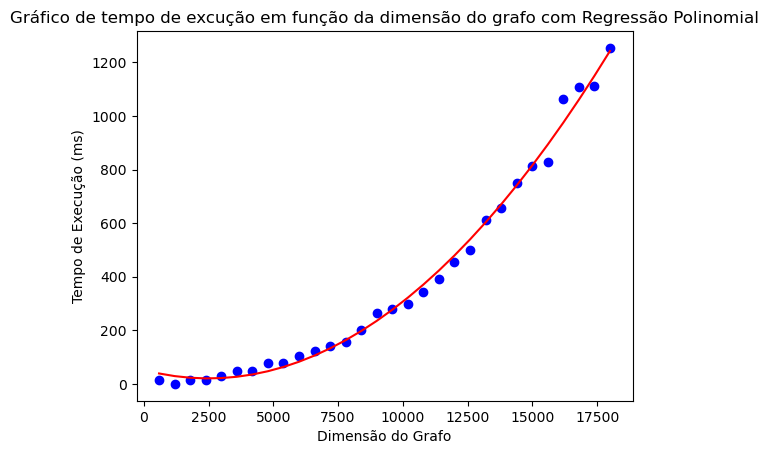

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Guarda o ficheiro csv num DataFrame (df)
caminhoFicheiro = "US14_Data.csv"
df = pd.read_csv(caminhoFicheiro, sep=';', header=None, names=['x_coluna', 'y_coluna'])

# Extrai as colunas corretas para x e y
x = df[['x_coluna']].values  # Variável independente (X)
y = df['y_coluna'].values    # Variável dependente (Y)

# Ordena os dados pelos valores de x
sorted_indices = np.argsort(x.flatten())
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Ajustar o grau do polinómio
grau = 2
poly = PolynomialFeatures(degree=grau)
x_poly = poly.fit_transform(x_sorted)

# Criar e treinar o modelo de regressão linear com características polinomiais
model = LinearRegression()
model.fit(x_poly, y_sorted)

# Fazer predições
y_pred = model.predict(x_poly)

# Plotar os resultados (Gráfico)
plt.scatter(x_sorted, y_sorted, color='blue')  # Pontos de dados originais
plt.plot(x_sorted, y_pred, color='red')        # Curva da regressão polinomial
plt.title('Gráfico de tempo de excução em função da dimensão do grafo com Regressão Polinomial')
plt.xlabel('Dimensão do Grafo')
plt.ylabel('Tempo de Execução (ms)')
plt.show()


## Análise e Interpretação

A análise do gráfico apresentado visa compreender a relação entre a dimensão do grafo e o tempo de execução de um determinado algoritmo. Para isso, aplicamos a técnica de regressão polinomial aos dados coletados, buscando encontrar a curva que melhor se ajusta a esses dados.

#### Descrição do Gráfico
No gráfico, os pontos azuis representam os dados observados, onde o eixo horizontal (x) indica a dimensão do grafo, enquanto o eixo vertical (y) mostra o tempo de execução medido em milissegundos (ms). A curva vermelha é a linha de regressão polinomial ajustada aos dados.

#### Interpretação dos resultados

1. Tendência Geral: Observa-se uma tendência crescente na relação entre a dimensão do grafo e o tempo de execução. À medida que a dimensão do grafo aumenta, o tempo de execução também aumenta de forma não linear.
2. Forma da Curva: A curva ajustada é uma parábola, indicando que a relação entre a dimensão do grafo e o tempo de execução é de natureza quadrática. Isso sugere que o tempo de execução cresce exponencialmente com o aumento da dimensão do grafo.
3. Qualidade de Ajuste: Visualmente, a linha de regressão polinomial parece ajustar-se bem aos dados, seguindo a tendência geral e capturando a curvatura dos pontos. A proximidade da curva vermelha aos pontos azuis sugere que o modelo polinomial de grau 2 é adequado para descrever essa relação.
4. Desempenho em Grandes Dimensões: Para dimensões menores do grafo, o tempo de execução permanece relativamente baixo e aumenta lentamente. No entanto, para dimensões maiores, há um aumento rápido no tempo de execução, o que é evidenciado pela curvatura acentuada da linha de regressão.
5. Aplicalidade do Modelo: Este modelo pode ser utilizado para prever o tempo de execução para grafos de dimensões não testadas, desde que essas dimensões estejam dentro do intervalo dos dados observados. No entanto, extrapolar este modelo para dimensões muito além dos dados testados pode não ser confiável, devido ao comportamento exponencial identificado.

#### Conclusões

1. Crescimento Exponencial: A regressão polinomial de grau 2 revelou que o tempo de execução do algoritmo aumenta exponencialmente com a dimensão do grafo.
2. Previsões: O modelo ajustado pode ser utilizado para prever tempos de execução para outras dimensões de grafo dentro do intervalo dos dados observados.
3. Limitações: Extrapolações para dimensões significativamente maiores devem ser feitas com cautela, pois o comportamento exponencial pode resultar em tempos de execução extremamente altos.

A análise realizada através da regressão polinomial fornece insights valiosos sobre o desempenho do algoritmo em função da dimensão do grafo. Esta informação é crucial para a otimização e planejamento de recursos em cenários onde o processamento de grafos grandes é necessário.

## Contribuição individual de FOURCORP

Bruno Teixeira (1230741):

Ricardo Meireles (1230744):

Francisco Pinho (1231235):

Joana Gama (1230399):